
# Project: Investigate a Dataset (TMDB Movie Dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
This dataset contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

At the end of this section, describe the questions that you plan on exploring over the course of the report. 

The questions I have planned to explore are:
1. Which is the most popular genre of all time?
2. What is the average duration of the movies?
3. What is the average number of movies released per year?
4. What is the average number of movies made by a director?
5. What is the total number of unique directors in dataset?
6. Who directed most movies?
7. Movies with largest and lowest budgets
8. Movies with largest and lowest revenue
9. Correlation between revenue and budget

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> load the data, check for cleanliness, and then trim and clean your dataset for analysis. 

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
tmdb_data = pd.read_csv('dataset/tmdb-movies.csv')
tmdb_data.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


#### Observation:
> First, there are columns that I don't need for my analysis, so I should drop those before using the data. And I should remove the duplicate data present.

### Data Cleaning

> **1. Remove unwanted columns**

In [3]:
# Cleaning the data
# list of columns need to droped
columns_to_drop = ['id', 'imdb_id', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'overview', 
                   'production_companies', 'vote_count', 'vote_average', 'tagline']
 
# drop list of columns
tmdb_data = tmdb_data.drop(columns_to_drop,1)

# print few data
tmdb_data.head(3)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2015


> **2. Remove Duplicates**

In [4]:
# Checking total number of rows and columns
print(tmdb_data.shape)

(10866, 10)


In [5]:
# remove duplicate rows in data
tmdb_data.drop_duplicates(keep ='first', inplace=True)

In [6]:
# Checking how many duplicate rows removed
print(tmdb_data.shape)

(10865, 10)


> Seems there was only one duplicate row in the data. it has been removed now.

In [7]:
tmdb_data.describe()

,popularity,budget,revenue,runtime,release_year
count,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000
mean,0.646446,1.462429e+07,3.982690e+07,102.071790,2001.321859
std,1.000231,3.091428e+07,1.170083e+08,31.382701,12.813260
min,0.000065,0.000000e+00,0.000000e+00,0.000000,1960.000000
25%,0.207575,0.000000e+00,0.000000e+00,90.000000,1995.000000
50%,0.383831,0.000000e+00,0.000000e+00,99.000000,2006.000000
75%,0.713857,1.500000e+07,2.400000e+07,111.000000,2011.000000
max,32.985763,4.250000e+08,2.781506e+09,900.000000,2015.000000


In [8]:
# find total null values
np.count_nonzero(tmdb_data.isnull()) 

143

#### Re-Used Functions

In [9]:
# Function that returns a list 
def convert_data(column):
    newList = []
    for data in column.dropna(): # dropna to drop NaNs
        data = data.split('|') # splits words at | 
        newList.append(data) # adds to a list
    return newList # this returns list of lists

# list of lists should be merged to find the number of occurances of same names
def merge_list_of_lists(newList):
    flatList = []
    for x in newList:
        for y in x:
            flatList.append(y)
    return flatList

# Function to find most occurance
def most_occurance(data):
    occurance_list =[]
    occurance_list = pd.Series(Counter(data))
    return occurance_list.argmax(max(occurance_list.values))

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (Which is the most popular genre of all time?)

In [10]:
movies_by_genre = tmdb_data.groupby('genres')['original_title','genres']

genre_list = convert_data(tmdb_data['genres'])
flattened_genre_list = merge_list_of_lists(genre_list)
most_occurance(flattened_genre_list)


D:\Programs\Anaconda3\lib\site-packages\ipykernel\__main__.py:21: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.


'Drama'

### Research Question 2  (What is the average duration of the movies?)

In [11]:
# calculate and print avg runtime of movies

# replacing 0 with NaN of runtime column in the dataset
# tmdb_data['runtime'] =tmdb_data['runtime'].replace(0, np.NAN)

duration = tmdb_data['runtime'].mean()
print('Average runtime of a movie is {0} minutes'.format(duration))

Average runtime of a movie is 102.07179015186378 minutes


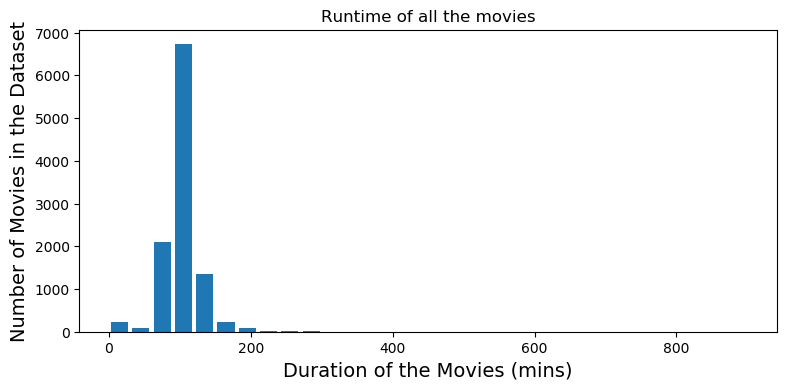

In [12]:
# histogram size(width, height)
plt.figure(figsize=(9,4), dpi = 100)

# x-axis label
plt.xlabel('Duration of the Movies (mins)', fontsize = 14)
# y-axis label
plt.ylabel('Number of Movies in the Dataset', fontsize=14)
# title
plt.title('Runtime of all the movies', fontsize=12)

#giving a histogram plot
plt.hist(tmdb_data['runtime'], rwidth = 0.8, bins =30)
plt.show()

> From this histogram, we can see that the most duration is between around 80 and 120 minutes

### Research Question 3  (What is the average number of movies released per year?)

In [13]:
# calculate number of movies made each year and print few
movies_by_year = tmdb_data.groupby('release_year')['original_title'].count()
movies_by_year.head()

release_year
1960    32
1961    31
1962    32
1963    34
1964    42
Name: original_title, dtype: int64

In [14]:
# find avg movies made per year
movies_by_year.mean()

194.01785714285714

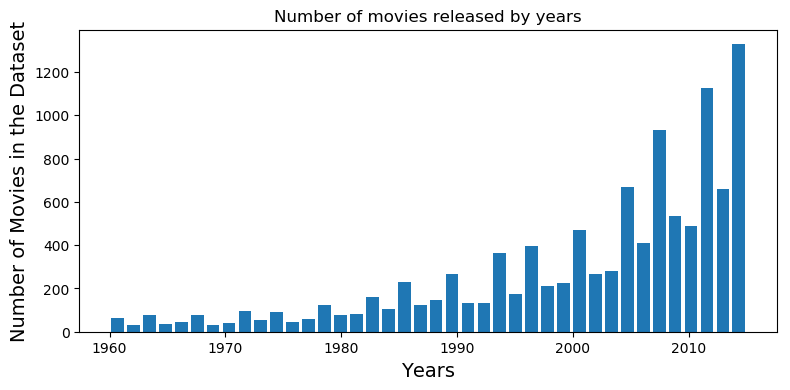

In [15]:

# histogram size(width, height)
plt.figure(figsize=(9,4), dpi = 100)

# x-axis label
plt.xlabel('Years', fontsize = 14)
# y-axis label
plt.ylabel('Number of Movies in the Dataset', fontsize=14)
# title
plt.title('Number of movies released by years', fontsize=12)

plt.hist(tmdb_data['release_year'], rwidth = 0.8, bins = 40)
plt.show()

### Research Question 4  (What is the average number of movies made by a director?)

In [16]:
director_list = convert_data(tmdb_data['director'])
flat_director_list = merge_list_of_lists(director_list)


# avg movies made by a director
avg_movie_made_by_a_director = pd.Series(Counter(flat_director_list))

print('Average number of movies made by a director is {0}'.format(avg_movie_made_by_a_director.mean()))

Average number of movies made by a director is 2.2176426706452816


### Research Question 5 (What is the total number of unique directors in dataset?)

In [17]:
# total number of unique directors


print('Total number of unique directors in dataset is {0}'.format(len(set(flat_director_list))))

Total number of unique directors in dataset is 5362


### Research Question 6 (Who directed most movies?)

In [18]:
most_occurance(flat_director_list)

D:\Programs\Anaconda3\lib\site-packages\ipykernel\__main__.py:21: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.


'Woody Allen'

### Research Question 7 (Movies with largest and lowest budgets)

In [19]:
import pprint

def calculate(column):
    # For high profit
    high= tmdb_data[column].idxmax()
    high_details=pd.DataFrame(tmdb_data.loc[high])
    
    # For low profit
    low= tmdb_data[column].idxmin()
    low_details=pd.DataFrame(tmdb_data.loc[low])
    
    # collectin data in one place
    info=pd.concat([high_details, low_details], axis=1)
    
    return info

#calling the function
calculate('budget')

,2244,30
popularity,0.25054,3.92733
budget,425000000,0
revenue,11087569,29355203
original_title,The Warrior's Way,Mr. Holmes
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Ian McKellen|Milo Parker|Laura Linney|Hattie M...
director,Sngmoo Lee,Bill Condon
runtime,100,103
genres,Adventure|Fantasy|Action|Western|Thriller,Mystery|Drama
release_date,12/2/10,6/19/15
release_year,2010,2015


Column - 2244 shows the large budget of 425000000 dollar.

Column - 2618 shows the small budget of 1 dollar

### Research Question 8 (Movies with largest and lowest revenue)

In [20]:
calculate('revenue')

,1386,48
popularity,9.43277,2.93234
budget,237000000,30000000
revenue,2781505847,0
original_title,Avatar,Wild Card
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Jason Statham|Michael Angarano|Milo Ventimigli...
director,James Cameron,Simon West
runtime,162,92
genres,Action|Adventure|Fantasy|Science Fiction,Thriller|Crime|Drama
release_date,12/10/09,1/14/15
release_year,2009,2015


Column - 1386 shows the large revenue of 2781505847 dollar.

Column - 5067 shows the small revenue of 2 dollar

### Research Question 9 (Correlation between revenue and budget)

Correlation Between Revenue And Budget :  0.6885561524636783


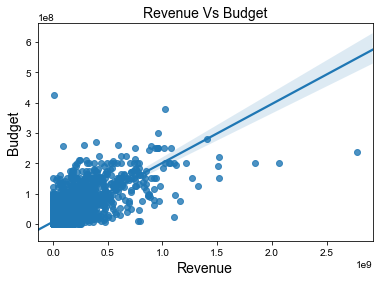

In [21]:

# how does revenue change according to the budget.

#make a scatter plot using 'regplot' between ''revenue' and 'budget'.
ax = sns.regplot(x=tmdb_data['revenue'], y=tmdb_data['budget'])

#set the title and labels of the figure
ax.set_title("Revenue Vs Budget",fontsize=14)
ax.set_xlabel("Revenue",fontsize=14)
ax.set_ylabel("Budget",fontsize=14)
#set the figure size
sns.set(rc={'figure.figsize':(10,7)})
sns.set_style("whitegrid")

#find the correlation between them
#change zero into NAN in budget and revenue column for the exact calculation.
tmdb_data['budget'] = tmdb_data['budget'].replace(0,np.NAN)
tmdb_data['revenue'] = tmdb_data['revenue'].replace(0,np.NAN)

# find the correlation
# returns the correlation between columns.
data_corr = tmdb_data.corr()
print("Correlation Between Revenue And Budget : ",data_corr.loc['revenue','budget'])

<a id='conclusions'></a>
## Conclusions


Well, this is a large dataset. We came out with a lot of interesting facts so we can conclude:

##### To make a successful movie
* The average duration of a movie must be around 102 minutes
* Should consider making the movie genre in 'Drama', Since it is the most popular genre of all time.
* Director should have an experience of making more than two movies, which is above average.
* If you need a well-experienced director, you should choose 'Woody Allen', because he made most movies in this dataset

##### Limitations
This might not be completely error-free, but by following these suggestions can increase the success of a movie to become a hit. not also we are not sure that the data provided to us is correct and up-to-date, if not the analysis could be wrong. Also dopping the rows with missing values also affected the overall analysis.